![DHNB 2024](https://github.com/hibernator11/workshop-notebooks-dhnb2024/raw/main/images/dhnb.png)

## Let's try to predict objects in the images provided by the digital collection Timarit

The images have been extracted from the website and are located in the `images/timarit` folder.

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from ultralytics import YOLO
from IPython.display import Image
import os


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [4]:
model = YOLO("yolov8n.pt")
result = model.predict(source='https://raw.githubusercontent.com/hibernator11/workshop-notebooks-dhnb2024/main/images/timarit/Sheep/20020601i1p18.jpg', save=True, name='timarit')

100%|██████████| 291k/291k [00:00<00:00, 4.80MB/s]


image 1/1 /content/20020601i1p18.jpg: 640x448 10 sheeps, 365.9ms
Speed: 18.2ms preprocess, 365.9ms inference, 3634.9ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/timarit


### Now we can see the result

Please change the path provided after the execution of the YOLO model in the code below.

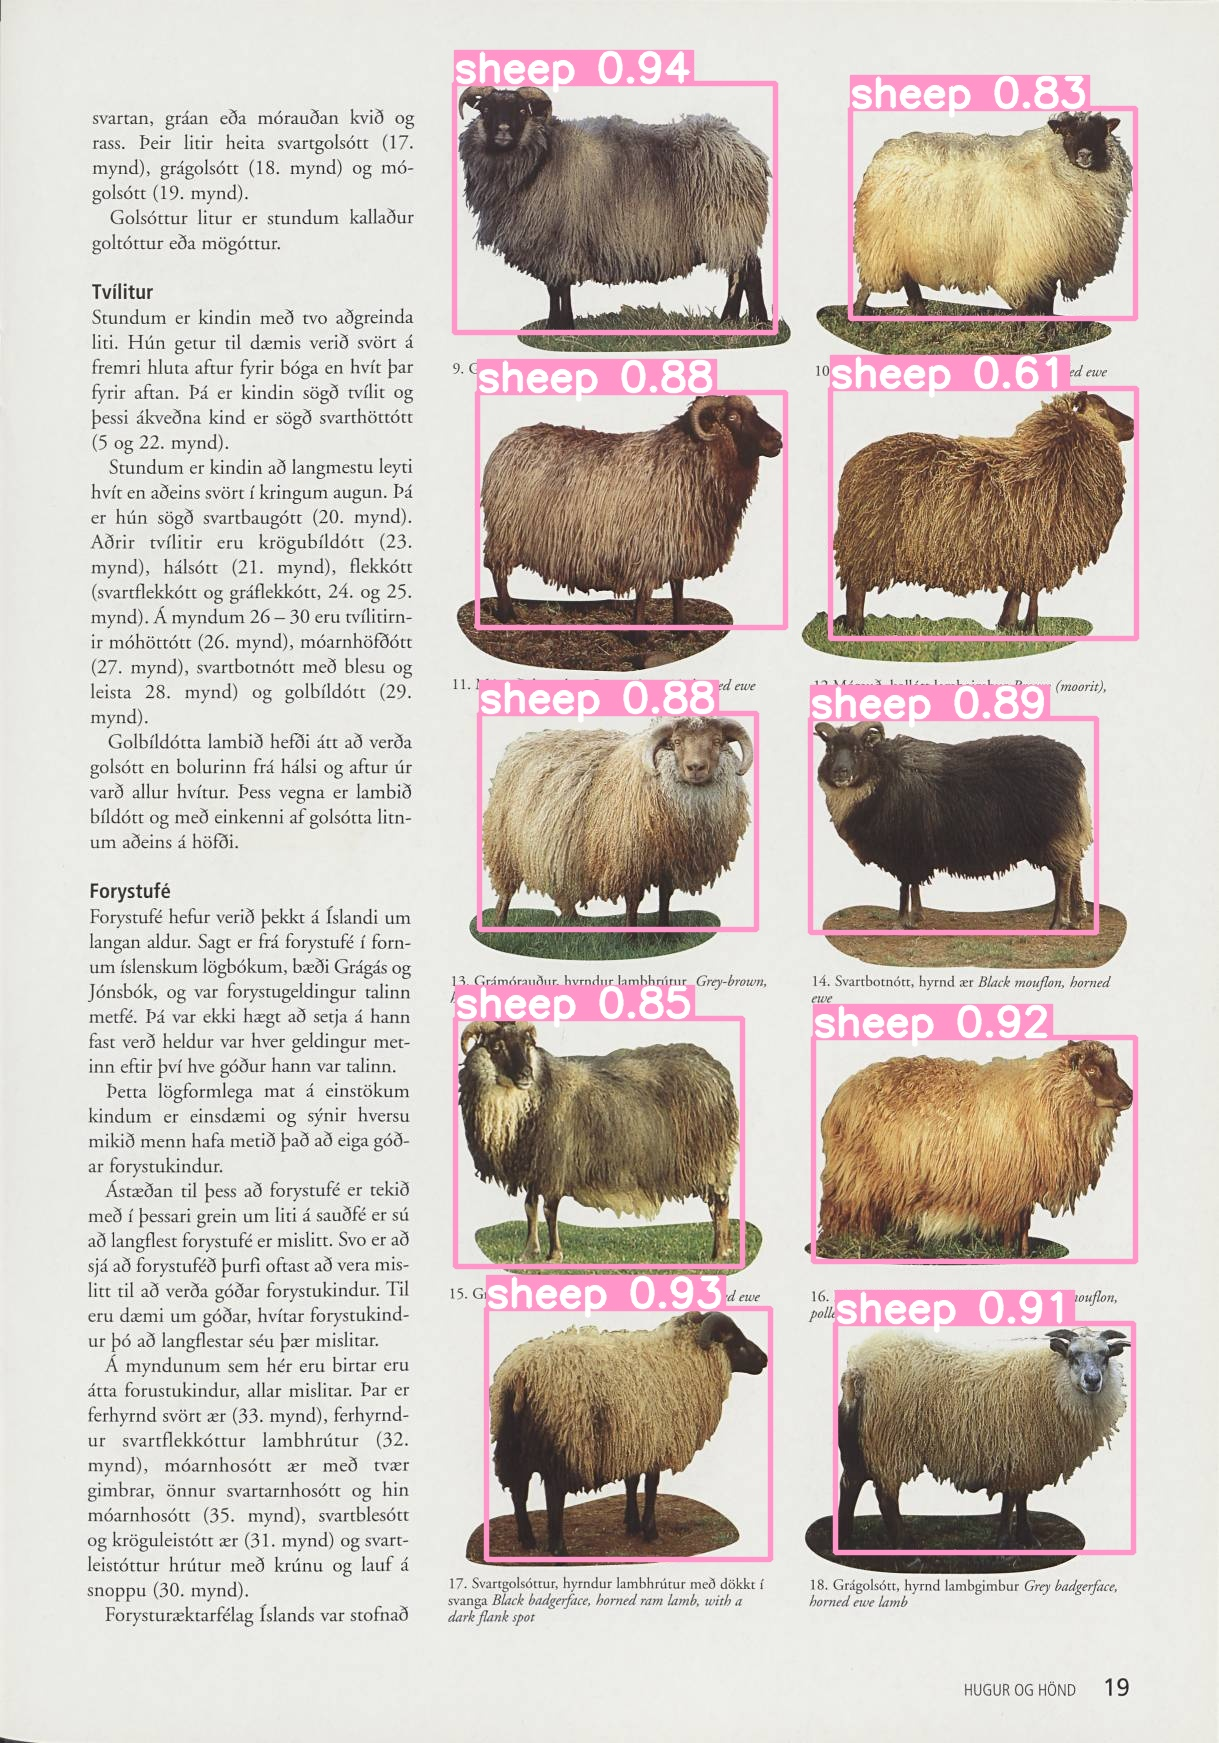

In [5]:
Image(filename='runs/detect/timarit/20020601i1p18.jpg', width=600)

### Let's now run the process for a folder

First we check all the images provided in the folder Sheep

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path = "../images/timarit/Sheep/"
path = "/content/drive/MyDrive/DHNB-2024/Sheep"
file_type = '.jpg'

for filename in os.listdir(path=path):
    if filename.endswith(file_type):
        print(filename)
        print(f"{path}/{filename}")
        # do something below

20191010i1p11.jpg
../images/timarit/Sheep//20191010i1p11.jpg
20200202i1p3.jpg
../images/timarit/Sheep//20200202i1p3.jpg
20180107i1p11.jpg
../images/timarit/Sheep//20180107i1p11.jpg
20200517i1p3.jpg
../images/timarit/Sheep//20200517i1p3.jpg
19881102i1p13.jpg
../images/timarit/Sheep//19881102i1p13.jpg
20211104i1p39.jpg
../images/timarit/Sheep//20211104i1p39.jpg
20211104i1p40.jpg
../images/timarit/Sheep//20211104i1p40.jpg
20180616i1p11.jpg
../images/timarit/Sheep//20180616i1p11.jpg
20220518i1p6.jpg
../images/timarit/Sheep//20220518i1p6.jpg
19871210i1p19.jpg
../images/timarit/Sheep//19871210i1p19.jpg
20020601i1p18.jpg
../images/timarit/Sheep//20020601i1p18.jpg
20020601i1p17.jpg
../images/timarit/Sheep//20020601i1p17.jpg


## Now we process the images in batch

In [46]:
path = "/content/drive/MyDrive/DHNB-2024/Sheep"
file_type = '.jpg'

predictions = []

for filename in os.listdir(path=path):
    if filename.endswith(file_type):
        file = path+'/'+filename

        # with the project parameter, it creates a folder in which the predictions are stored
        result = model.predict(source=file, save=True, project="timarit", name='sheep')
        prediction_file = '/content/' + result[0].save_dir + '/' + filename

        # save the prediction image file
        print(prediction_file)
        predictions.append(prediction_file)


image 1/1 /content/drive/MyDrive/DHNB-2024/Sheep/20020601i1p17.jpg: 640x480 1 person, 8 sheeps, 206.7ms
Speed: 6.6ms preprocess, 206.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to timarit/sheep13
/content/timarit/sheep13/20020601i1p17.jpg

image 1/1 /content/drive/MyDrive/DHNB-2024/Sheep/20020601i1p18.jpg: 640x448 10 sheeps, 168.0ms
Speed: 3.6ms preprocess, 168.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)
Results saved to timarit/sheep14
/content/timarit/sheep14/20020601i1p18.jpg

image 1/1 /content/drive/MyDrive/DHNB-2024/Sheep/19871210i1p19.jpg: 640x448 8 sheeps, 1 book, 186.1ms
Speed: 3.5ms preprocess, 186.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to timarit/sheep15
/content/timarit/sheep15/19871210i1p19.jpg

image 1/1 /content/drive/MyDrive/DHNB-2024/Sheep/20220518i1p6.jpg: 640x480 2 persons, 1 dog, 4 sheeps, 184.1ms
Speed: 3.5ms preprocess, 184.1ms inference, 1.6ms postprocess 

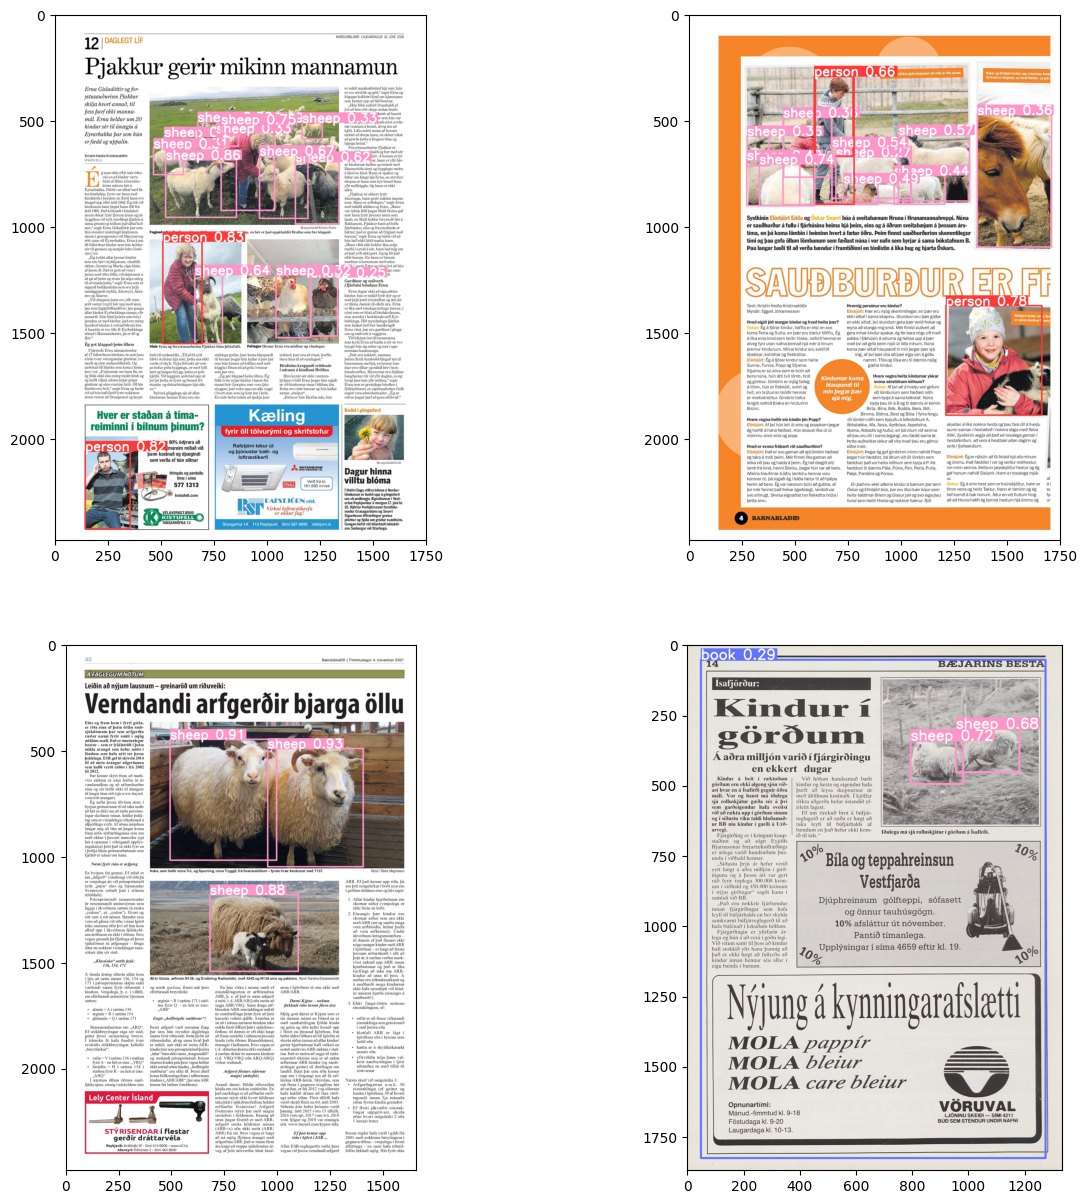

In [57]:
import matplotlib.pyplot as plt
from PIL import Image

rows=2
cols = 2
img_count = 5

images = [Image.open(f) for f in predictions]

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):
        if img_count < len(predictions):
            axes[i, j].imshow(images[img_count])
            img_count+=1
